In [134]:
%load_ext autoreload
%autoreload 2

import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, os.path.join(parent_dir)) 

from shapely.geometry import Point

import numpy as np
from topo2vec.datasets.random_dataset import RandomDataset
from topo2vec.datasets.class_dataset import ClassDataset
from topo2vec.common.visualizations import *
from topo2vec.constants import *
import random
import pyperclip
from shapely.geometry import Point


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
class_label = 'rock'
test = False

if test:
    path = '/home/morpheus/topo2vec_kavitzky/repositories/topo2vec/data/overpass_classes_data_all/overpass_classes_data/tests/'+str(class_label)+'s_test_(45,10,50,15).json'
    ds_size = 35
else:
    path = '/home/morpheus/topo2vec_kavitzky/repositories/topo2vec/data/overpass_classes_data_all/overpass_classes_data/'+str(class_label)+'s_(45,5,50,15).json'
    ds_size = 800

if class_label!='random':
    dataset = ClassDataset(radii = [20], first_class_path = path, first_class_label=0, wanted_size= ds_size, outer_polygon=VALIDATION_HALF_LARGE)
else: #random
    ds_size = 2000
    dataset = RandomDataset(radii = [20], num_points = ds_size, outer_polygon=VALIDATION_HALF_LARGE)

loading from: /home/morpheus/topo2vec_kavitzky/repositories/topo2vec/data/cache/datasets/rocks_(45,5,50,15)/None_800_label_0/points.npy
loaded. time it took:0.0007505416870117188 sec
loading from: /home/morpheus/topo2vec_kavitzky/repositories/topo2vec/data/cache/datasets/rocks_(45,5,50,15)/None_800_label_0/actual_patches.npy
loaded. time it took:0.3545265197753906 sec
loading from: /home/morpheus/topo2vec_kavitzky/repositories/topo2vec/data/cache/datasets/rocks_(45,5,50,15)/None_800_label_0/points_locations.npy
loaded. time it took:0.0010619163513183594 sec
loading from: /home/morpheus/topo2vec_kavitzky/repositories/topo2vec/data/cache/datasets/rocks_(45,5,50,15)/None_800_label_0/labels.npy
loaded. time it took:0.0005593299865722656 sec


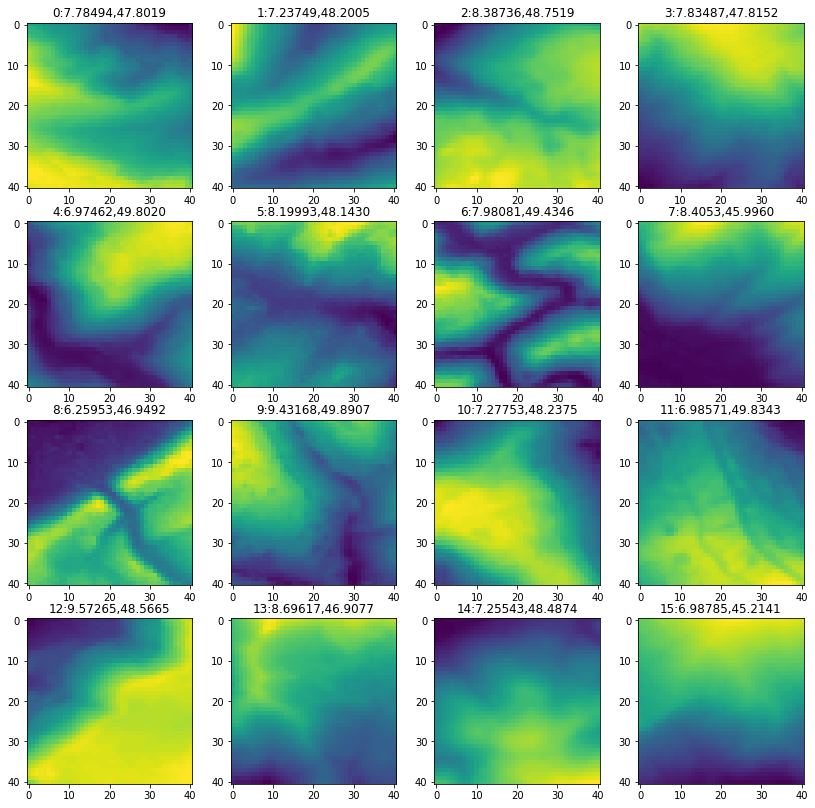

In [136]:
def print_json_point(points, class_name):
    for point in points:
        lat = point.y
        lon = point.x
        print('{\n\t"type": "node",\n\t"lat":'+str(lat)+',\n\t"lon":'+str(lon)+',\n\t"tags": {\n\t\t"natural": "'+str(class_name)+'"\n\t}\n},')

wanted_size = 16
random_indices = random.sample(list(range(len(dataset))), wanted_size)
images =[dataset.actual_patches[i][0,:,:] for i in random_indices]
points =[dataset.points_locations[i] for i in random_indices]
titles = [f'{i}:{str(point.x)[:7]},{str(point.y)[:7]}' for i,point in enumerate(points)]
plot_n_np_arrays(images, lines_number = 4, titles=titles)